In [1]:
import scipy.optimize as opt

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def func(x, a,c):
    return c * np.exp(a*x)

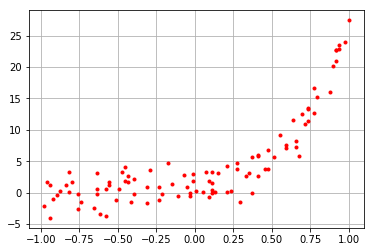

In [77]:
x = np.linspace(-1, 1, 100)
y = func(x, 3.1, 1.2)
#plt.plot(x, y)


sample = np.random.randint(len(x), size=100)
xs = x[sample]
ys = y[sample]
ys += np.random.normal(0, 2, len(ys))
plt.plot(xs, ys, 'r.')



plt.grid();

In [78]:
results = list()

### curve fit

In [79]:
params, _ = opt.curve_fit(func, xs, ys)
print ('parameters ', params)

ssq = np.sum((func(xs, *params)-ys)**2)
print ('ssq ', ssq)


results.append(dict(method='curvefit', params=params, ssq=ssq))

parameters  [3.18791938 1.14004286]
ssq  352.2047646121165


### minimize ssq

In [80]:
def minmodel(vec):
    a, c = vec
    return np.sum((func(xs, *vec) - ys)**2)

solution = opt.minimize(minmodel, [2.7, 0.6])
params = solution.x
print ('parameters ', params)

ssq = np.sum((func(xs, *params)-ys)**2)
print ('ssq ', ssq)

results.append(dict(method='minssq', params=params, ssq=ssq))

parameters  [3.18791937 1.14004287]
ssq  352.2047646121165


### partial differentials

In [81]:
a, c = 2.7, 0.7

def rootmodel(vec):
    a, c = vec
    dc = np.sum([(func(x, a,c)-y)*np.exp(a*x) for (x,y) in zip(xs,ys)])
    da = np.sum([(func(x, a,c)-y)*c*np.exp(a*x)*x for (x,y) in zip(xs,ys)])
    return [da, dc]

roots = opt.root(rootmodel, [3, 1])
params = roots.x
print (roots.message)
print (roots.success)
print ('parameters ', params)

ssq = np.sum((func(xs, *params)-ys)**2)
print ('ssq ', ssq)

results.append(dict(method='partdiff', params=params, ssq=ssq))

The solution converged.
True
parameters  [3.18791941 1.14004284]
ssq  352.20476461211643


### compare methods

In [82]:
sorted(results, key=lambda x: x['ssq'])

[{'method': 'partdiff',
  'params': array([3.18791941, 1.14004284]),
  'ssq': 352.20476461211643},
 {'method': 'curvefit',
  'params': array([3.18791938, 1.14004286]),
  'ssq': 352.2047646121165},
 {'method': 'minssq',
  'params': array([3.18791937, 1.14004287]),
  'ssq': 352.2047646121165}]

In [83]:
bestparams = sorted(results, key=lambda x: x['ssq'])[0]['params']
bestparams

array([3.18791941, 1.14004284])

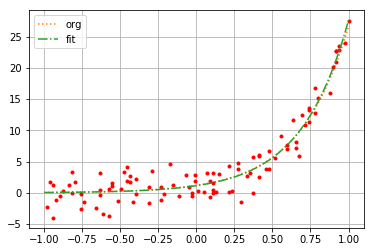

In [84]:
plt.plot(x, y, ':', color='C1', label='org')
plt.plot(xs, ys, 'r.')

yfit = func(x, *bestparams)
plt.plot(x, yfit, '-.', color='C2', label='fit')

plt.grid();
plt.legend();